In [44]:
print('Data Story: Evaluation of Drug Consumption Risk')
import pandas as pd
import urllib
u=urllib.urlopen('http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29')
text=u.read()
import re
matches=re.findall(r"\d+\.\s\w+", text)
del(matches[0:3])
del(matches[12])
for i in range(0, len(matches)):
    matches[i]=re.sub(r"\d+\.\s","",matches[i])
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"
data = pd.read_csv(url,names=matches) #import data

Data Story: Evaluation of Drug Consumption Risk


In [45]:
#Create Binary variable seperating use by those who use at a month frequecy or more
data=data.replace(['CL0','CL1','CL2','CL3'],0)
data=data.replace(['CL4','CL5','CL6'],1)
#coorelate attributes with drug use
coormat=data.corr()
#make scatterplot matrix
#for each drug find the top 3 correlated attributes make scatterplots

Characteristics of Population Surveyed
Data is more representative of young adults than older adults


KeyError: 'Age'

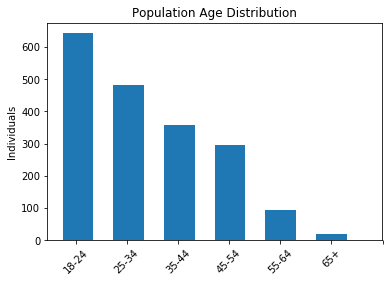

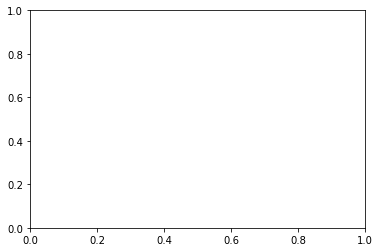

In [46]:
#Count something interesting
print('Characteristics of Population Surveyed')
import matplotlib.pyplot as py
%matplotlib inline
#Age
age=['','18-24','25-34','35-44','45-54','55-64','65+']
ax=py.subplot(111)
py.hist(data.Age*.84+.17,bins=6,histtype='bar', align='mid',width=0.3)
py.ylabel('Individuals')
#ax.set_xticks(map(lambda x: x, range(1,len(data.Age)+1)))
ax.set_xticklabels(age,rotation=45)
py.title('Population Age Distribution')
print('Data is more representative of young adults than older adults')
c=data[['Age','Education']].groupby(['Age','Education']).size()
fig=py.figure(2)
ax=fig.add_subplot(1,1,1)
ax.scatter(c['Age'],c['Education'],c.iloc[:,2]) #How do I make a bubble plot?

In [31]:
#Which attributes have the 
sub_coormat=coormat.iloc[13:,1:13]
for i in xrange(0,len(sub_coormat.iloc[:,0])):
    footop=sub_coormat.iloc[i,:].sort_values().head(3)
    foobot=sub_coormat.iloc[i,:].sort_values().tail(3)
    print(footop)
    print(foobot)

Age         -0.062820
Nscore      -0.032237
Impulsive    0.011771
Name: Alcohol, dtype: float64
Country      0.078652
Education    0.127310
Escore       0.134599
Name: Alcohol, dtype: float64
Country   -0.297362
Cscore    -0.180751
Age       -0.175875
Name: Amphet, dtype: float64
Oscore       0.115426
SS           0.206502
Impulsive    0.210708
Name: Amphet, dtype: float64
Gender   -0.083569
Age      -0.075914
Ascore   -0.064323
Name: Amyl, dtype: float64
Ethnicity    0.042747
Impulsive    0.061961
SS           0.111118
Name: Amyl, dtype: float64
Country   -0.299118
Cscore    -0.147825
Ascore    -0.136980
Name: Benzos, dtype: float64
Impulsive    0.175142
SS           0.188252
Nscore       0.223672
Name: Benzos, dtype: float64
Age       -0.023063
Cscore    -0.021448
Country   -0.012992
Name: Caff, dtype: float64
Escore       0.061392
SS           0.077285
Impulsive    0.078646
Name: Caff, dtype: float64
Country   -0.514411
Age       -0.410244
Gender    -0.279195
Name: Cannabis, dtype: 

In [ ]:

"""data.Gender
data.Education
data.Country
data.Ethnicity
data.Nscore
data.Escore
data.Oscore
data.Ascore
data.Cscore
data.Impulsive
data.SS"""

In [52]:
c.unstack()

Education,-2.43591,-1.7379,-1.43719,-1.22751,-0.61113,-0.05921,0.45468,1.16365,1.98437
Age,,,,,,,,,
-0.95197,9.0,16.0,12.0,61.0,331.0,43.0,126.0,43.0,2.0
-0.07854,3.0,15.0,6.0,17.0,85.0,52.0,150.0,115.0,38.0
0.49788,3.0,27.0,6.0,8.0,48.0,90.0,97.0,54.0,23.0
1.09449,6.0,32.0,4.0,9.0,28.0,65.0,78.0,53.0,19.0
1.82213,4.0,5.0,2.0,4.0,12.0,17.0,28.0,16.0,5.0
2.59171,3.0,4.0,NaN,1.0,2.0,3.0,1.0,2.0,2.0
